<a href="https://colab.research.google.com/github/pdpavandesai/MergingDiabetesData/blob/main/ModelBuilding_WithoutClinicalFeatures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import plot_tree

In [2]:
from google.colab import files
uploaded = files.upload()

Saving FinalMergedDS.csv to FinalMergedDS.csv


In [3]:
fmds_actual = pd.read_csv('FinalMergedDS.csv')
fmds_copy = fmds_actual.copy()
print("Shape of FMDS before removing duplicates: ",fmds_copy.shape)
actual_rows = fmds_copy.shape[0]
fmds_copy = fmds_copy.drop_duplicates()
print('Shape of dataset after removing the duplicates: ',fmds_copy.shape)
rows_after_deleting_duplicates = fmds_copy.shape[0]
print('No.of Duplicate rows in the Ishan Dutta''s Dataset = ', (actual_rows - rows_after_deleting_duplicates))

Shape of FMDS before removing duplicates:  (267882, 5)
Shape of dataset after removing the duplicates:  (25802, 5)
No.of Duplicate rows in the Ishan Duttas Dataset =  242080


In [ ]:
print(fmds_copy.head())
print('')
print('===Information of FMDS===')
print(fmds_copy.info())
print('')
print('===Description of FMDS===')
print(fmds_copy.describe())

   Age   BMI  HighChol  HighBP  Diabetes
0    9  40.0         1       1         0
1    7  25.0         0       0         0
2    9  28.0         1       1         0
3   11  27.0         0       1         0
4   11  24.0         1       1         0

===Information of FMDS===
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25802 entries, 0 to 267878
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       25802 non-null  int64  
 1   BMI       25802 non-null  float64
 2   HighChol  25802 non-null  int64  
 3   HighBP    25802 non-null  int64  
 4   Diabetes  25802 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 1.2 MB
None

===Description of FMDS===
                Age           BMI      HighChol        HighBP      Diabetes
count  25802.000000  25802.000000  25802.000000  25802.000000  25802.000000
mean       6.605806     28.373999      0.218123      0.187001      0.165181
std        3.836438      6.162468  

In [ ]:
print('===No.of Unique Values===')
print(fmds_copy.nunique())
print('')
print('===Check for any NAN values===')
print(fmds_copy.isnull().sum())

===No.of Unique Values===
Age           14
BMI         2708
HighChol       2
HighBP         2
Diabetes       2
dtype: int64

===Check for any NAN values===
Age         0
BMI         0
HighChol    0
HighBP      0
Diabetes    0
dtype: int64


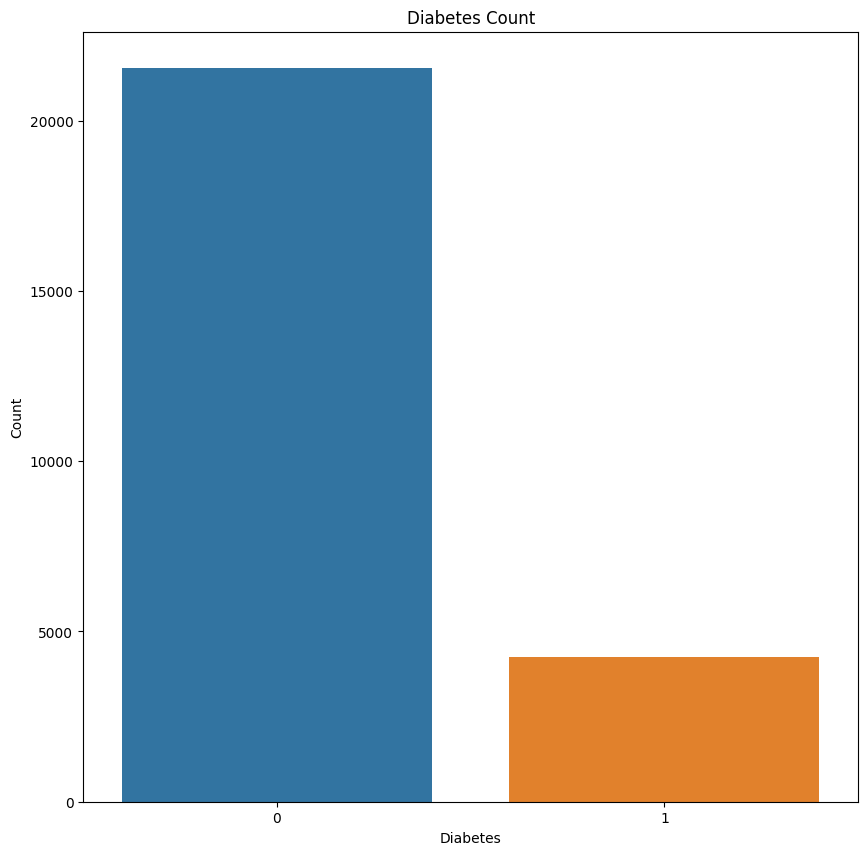

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(data=fmds_copy, x='Diabetes')
plt.title('Diabetes Count')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

In [9]:
# Splitting data into training & testing data
X_train, X_test, y_train, y_test = train_test_split(fmds_copy.drop('Diabetes', axis=1), fmds_copy['Diabetes'], test_size=0.25, random_state=42)

ANN model in predicting diabetes for clinical features

Accuracy when lbfgs solver is used: 86.65 % when max_iter =  1000
Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      5353
           1       0.71      0.37      0.48      1098

    accuracy                           0.87      6451
   macro avg       0.79      0.67      0.70      6451
weighted avg       0.85      0.87      0.85      6451



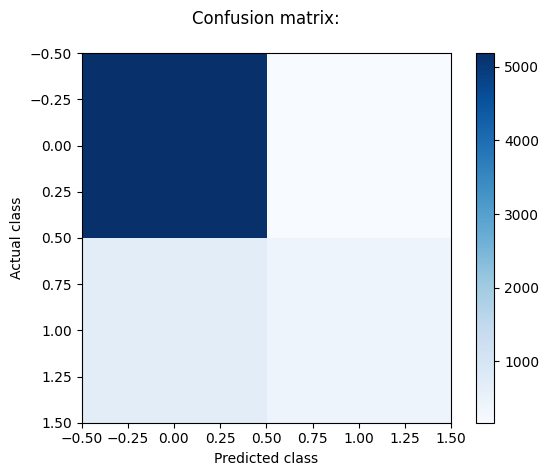

You are free from diabtes

Accuracy when sgd solver is used: 86.78 % when max_iter =  1000
Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      5353
           1       0.68      0.41      0.52      1098

    accuracy                           0.87      6451
   macro avg       0.79      0.69      0.72      6451
weighted avg       0.85      0.87      0.85      6451



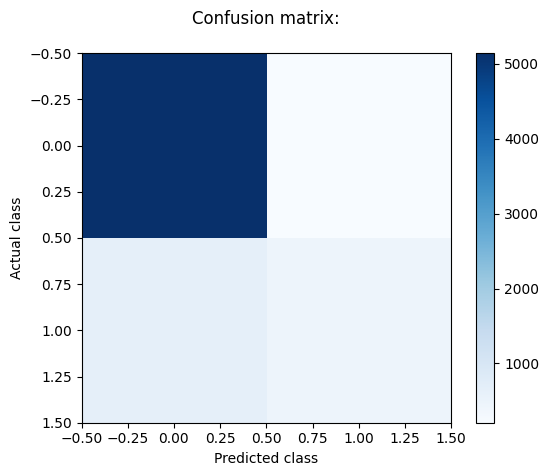

You are free from diabtes

Accuracy when adam solver is used: 86.92 % when max_iter =  1000
Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      5353
           1       0.76      0.34      0.47      1098

    accuracy                           0.87      6451
   macro avg       0.82      0.66      0.70      6451
weighted avg       0.86      0.87      0.85      6451



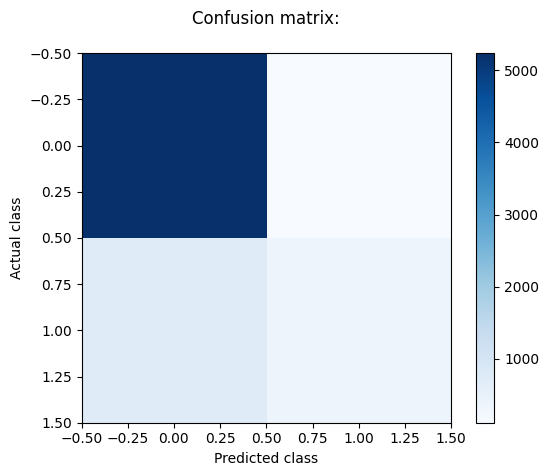

You are free from diabtes

Accuracy when lbfgs solver is used: 86.33 % when max_iter =  1200
Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      5353
           1       0.68      0.37      0.48      1098

    accuracy                           0.86      6451
   macro avg       0.78      0.67      0.70      6451
weighted avg       0.85      0.86      0.85      6451



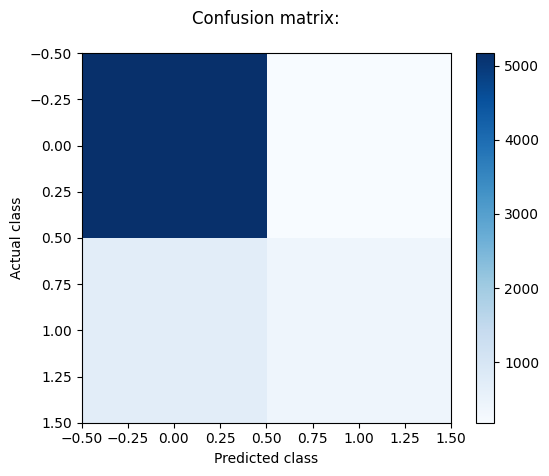

You are free from diabtes

Accuracy when sgd solver is used: 86.54 % when max_iter =  1200
Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      5353
           1       0.68      0.39      0.50      1098

    accuracy                           0.87      6451
   macro avg       0.78      0.68      0.71      6451
weighted avg       0.85      0.87      0.85      6451



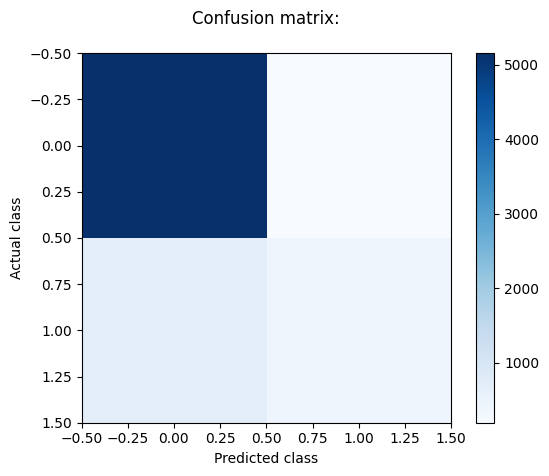

You are free from diabtes

Accuracy when adam solver is used: 86.85 % when max_iter =  1200
Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      5353
           1       0.71      0.38      0.50      1098

    accuracy                           0.87      6451
   macro avg       0.80      0.67      0.71      6451
weighted avg       0.86      0.87      0.85      6451



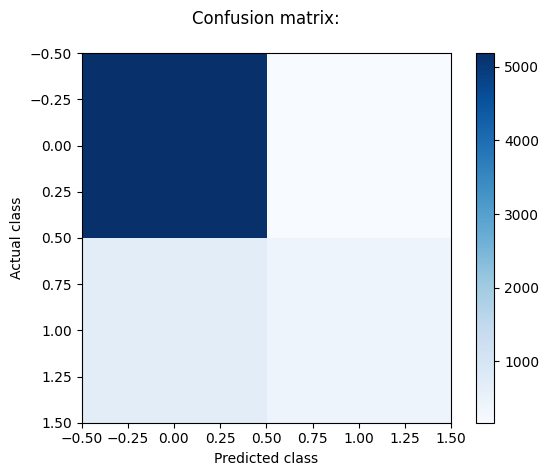

You are free from diabtes

Accuracy when lbfgs solver is used: 86.84 % when max_iter =  1400
Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      5353
           1       0.71      0.38      0.50      1098

    accuracy                           0.87      6451
   macro avg       0.80      0.68      0.71      6451
weighted avg       0.85      0.87      0.85      6451



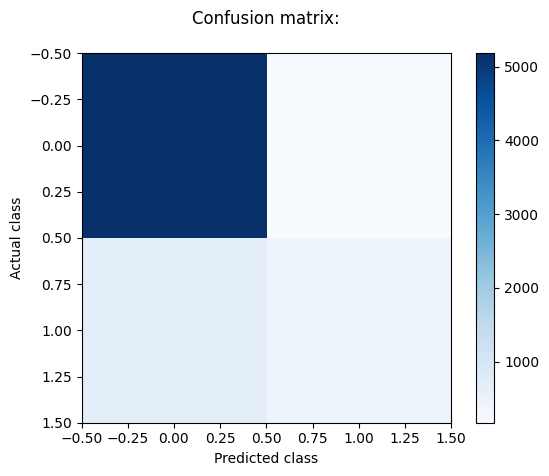

You are free from diabtes

Accuracy when sgd solver is used: 86.61 % when max_iter =  1400
Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      5353
           1       0.72      0.35      0.47      1098

    accuracy                           0.87      6451
   macro avg       0.80      0.66      0.70      6451
weighted avg       0.85      0.87      0.85      6451



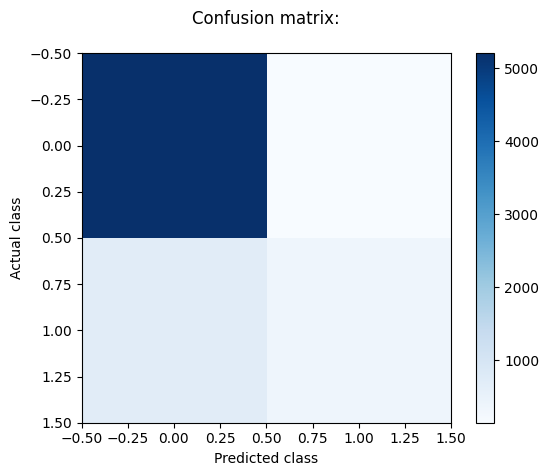

You are free from diabtes

Accuracy when adam solver is used: 86.99 % when max_iter =  1400
Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      5353
           1       0.79      0.32      0.46      1098

    accuracy                           0.87      6451
   macro avg       0.83      0.65      0.69      6451
weighted avg       0.86      0.87      0.85      6451



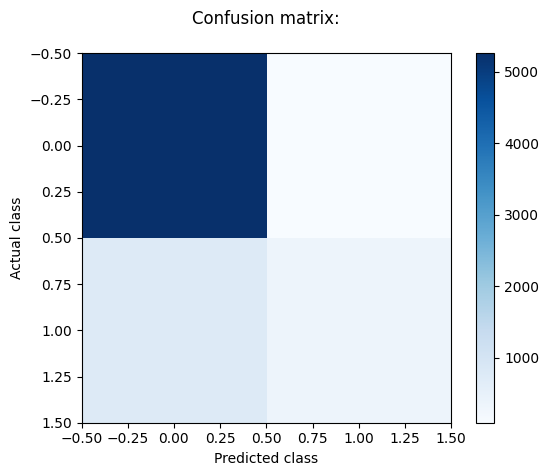

You are free from diabtes

Accuracy when lbfgs solver is used: 86.51 % when max_iter =  1600
Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      5353
           1       0.71      0.35      0.47      1098

    accuracy                           0.87      6451
   macro avg       0.80      0.66      0.70      6451
weighted avg       0.85      0.87      0.85      6451



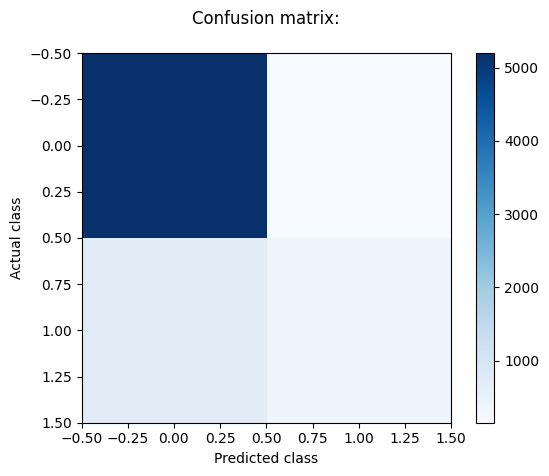

You are free from diabtes

Accuracy when sgd solver is used: 86.73 % when max_iter =  1600
Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      5353
           1       0.71      0.37      0.49      1098

    accuracy                           0.87      6451
   macro avg       0.80      0.67      0.71      6451
weighted avg       0.85      0.87      0.85      6451



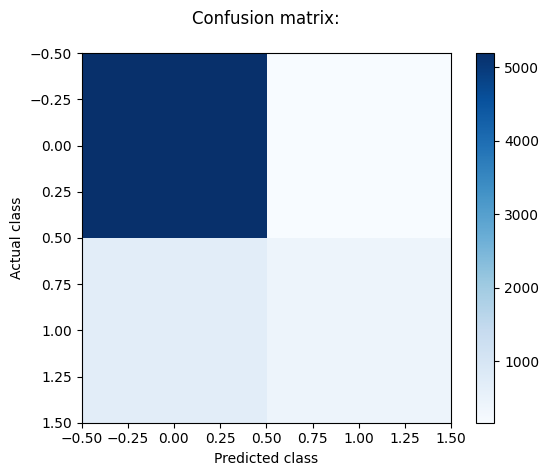

You are free from diabtes

Accuracy when adam solver is used: 87.06 % when max_iter =  1600
Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      5353
           1       0.76      0.35      0.48      1098

    accuracy                           0.87      6451
   macro avg       0.82      0.67      0.70      6451
weighted avg       0.86      0.87      0.85      6451



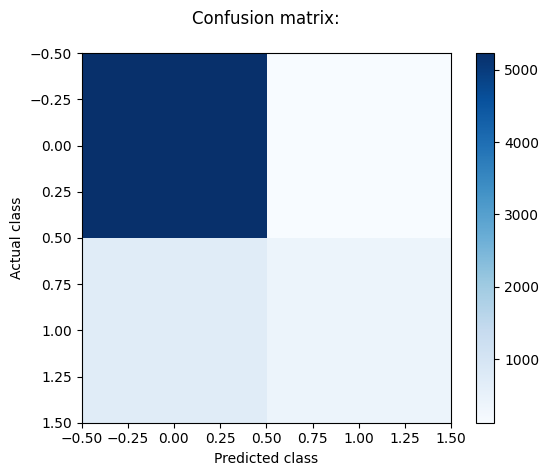

You are free from diabtes

Accuracy when lbfgs solver is used: 86.53 % when max_iter =  1800
Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      5353
           1       0.70      0.36      0.48      1098

    accuracy                           0.87      6451
   macro avg       0.79      0.67      0.70      6451
weighted avg       0.85      0.87      0.85      6451



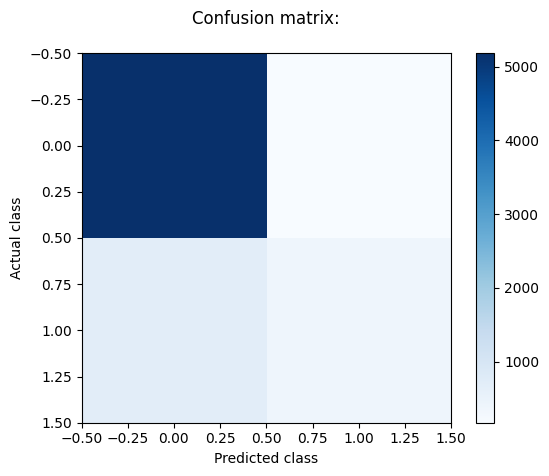

You are free from diabtes

Accuracy when sgd solver is used: 86.62 % when max_iter =  1800
Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      5353
           1       0.70      0.38      0.49      1098

    accuracy                           0.87      6451
   macro avg       0.79      0.67      0.71      6451
weighted avg       0.85      0.87      0.85      6451



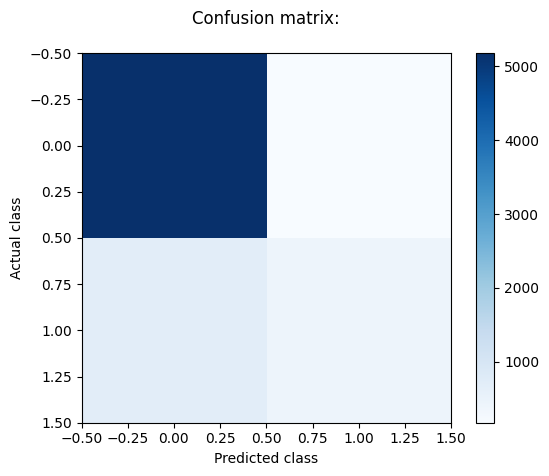

You are free from diabtes

Accuracy when adam solver is used: 87.29 % when max_iter =  1800
Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      5353
           1       0.77      0.36      0.49      1098

    accuracy                           0.87      6451
   macro avg       0.83      0.67      0.71      6451
weighted avg       0.86      0.87      0.85      6451



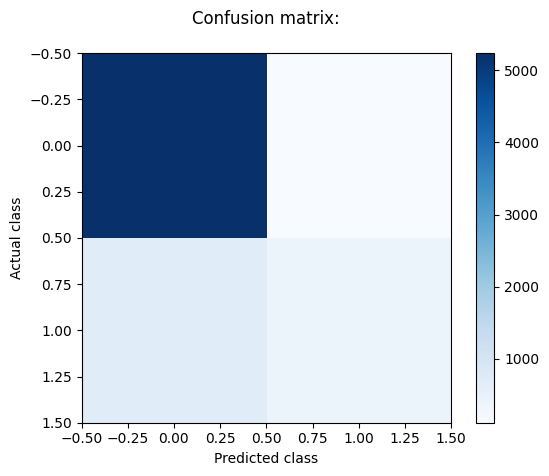

You are free from diabtes

Accuracy when lbfgs solver is used: 86.48 % when max_iter =  2000
Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      5353
           1       0.69      0.37      0.48      1098

    accuracy                           0.86      6451
   macro avg       0.79      0.67      0.70      6451
weighted avg       0.85      0.86      0.85      6451



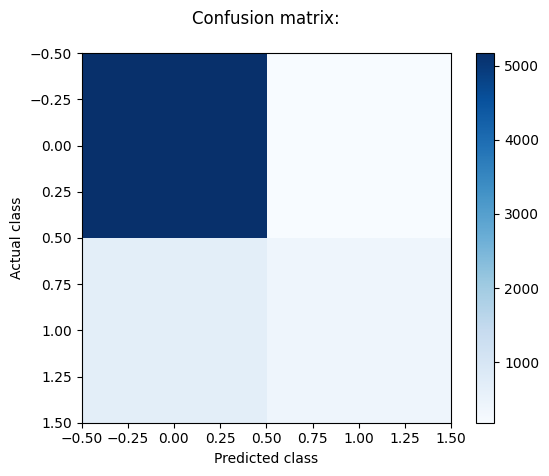

You are free from diabtes

Accuracy when sgd solver is used: 86.33 % when max_iter =  2000
Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      5353
           1       0.65      0.43      0.52      1098

    accuracy                           0.86      6451
   macro avg       0.77      0.69      0.72      6451
weighted avg       0.85      0.86      0.85      6451



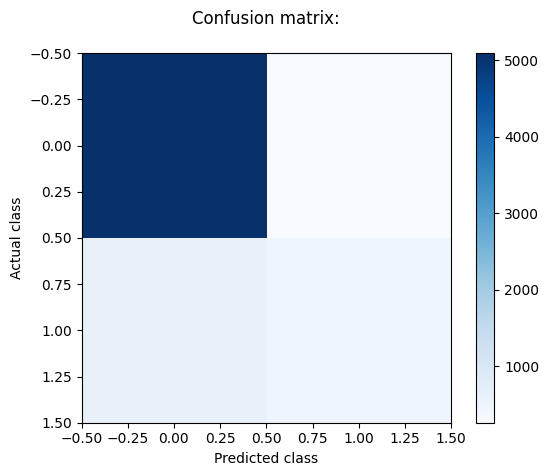

You are free from diabtes

Accuracy when adam solver is used: 86.75 % when max_iter =  2000
Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      5353
           1       0.73      0.35      0.48      1098

    accuracy                           0.87      6451
   macro avg       0.80      0.66      0.70      6451
weighted avg       0.85      0.87      0.85      6451



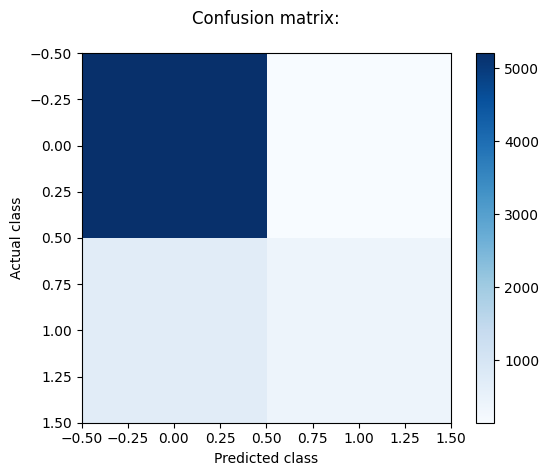

You are free from diabtes



In [10]:
# Creating ANN with different solvers and with max_iterations
print('ANN model in predicting diabetes for clinical features\n')
for max_iterations in range(1000,2200,200):
  for solvers in ['lbfgs','sgd','adam']:
    model_sgd = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='relu', solver=solvers, max_iter= max_iterations)
    # Training model_sgd
    model_sgd.fit(X_train, y_train)
    # Evaluate model_sgd on test set
    accuracy = model_sgd.score(X_test, y_test)
    accuracy = round(accuracy*100,2)
    print('Accuracy when', solvers, 'solver is used:', accuracy,'% when max_iter = ',max_iterations)
    # Make predictions on new data
    new_data = pd.DataFrame({'Age': [10], 'BMI': [34], 'HighChol': [1], 'HighBP': [1]})
    predictions_sgg_model_sgd = model_sgd.predict(new_data)
    y_pred = model_sgd.predict(X_test)
    print('Evaluation Metrics:\n')
    print(classification_report(y_test, y_pred))

    confusion_mat = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plt.imshow(confusion_mat, cmap='Blues', interpolation='nearest')
    plt.xlabel('Predicted class')
    plt.ylabel('Actual class')
    plt.colorbar()
    plt.title('Confusion matrix:\n')
    plt.show()
    if predictions_sgg_model_sgd == 1:
      print('You have diabetes')
      print('')
    else:
      print('You are free from diabtes')
      print('')

ANN model in predicting diabetes for clinical features with logistic activation function

Accuracy when lbfgs solver is used: 87.12 % when max_iter =  1000
Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      5353
           1       0.76      0.35      0.48      1098

    accuracy                           0.87      6451
   macro avg       0.82      0.66      0.70      6451
weighted avg       0.86      0.87      0.85      6451



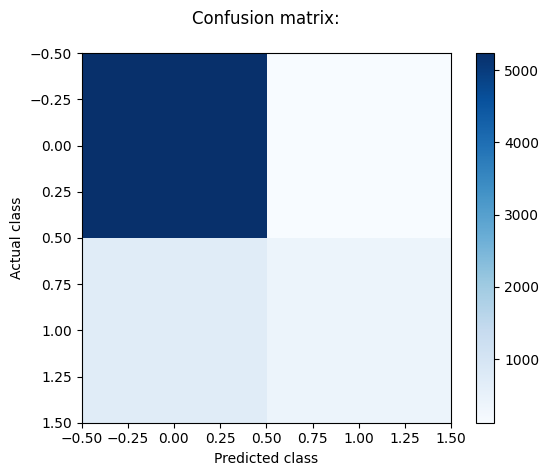

You are free from diabtes

Accuracy when sgd solver is used: 82.98 % when max_iter =  1000
Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      5353
           1       0.00      0.00      0.00      1098

    accuracy                           0.83      6451
   macro avg       0.41      0.50      0.45      6451
weighted avg       0.69      0.83      0.75      6451



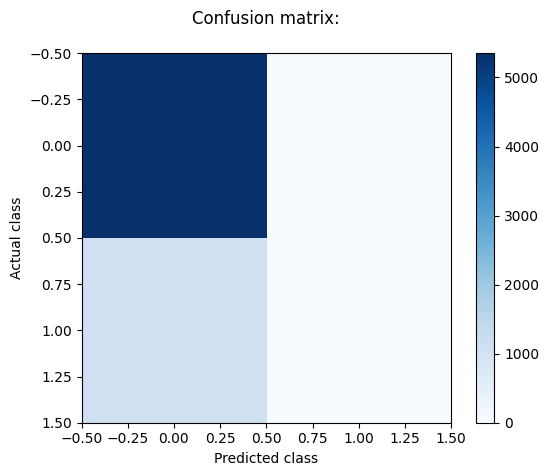

You are free from diabtes

Accuracy when adam solver is used: 86.73 % when max_iter =  1000
Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      5353
           1       0.73      0.35      0.47      1098

    accuracy                           0.87      6451
   macro avg       0.81      0.66      0.70      6451
weighted avg       0.85      0.87      0.85      6451



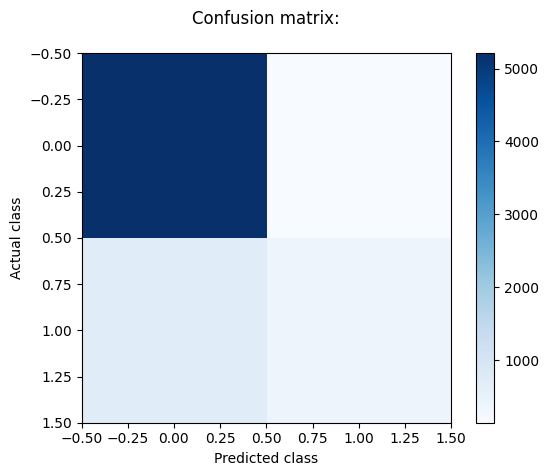

You are free from diabtes

Accuracy when lbfgs solver is used: 87.3 % when max_iter =  1200
Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      5353
           1       0.78      0.35      0.49      1098

    accuracy                           0.87      6451
   macro avg       0.83      0.67      0.71      6451
weighted avg       0.86      0.87      0.85      6451



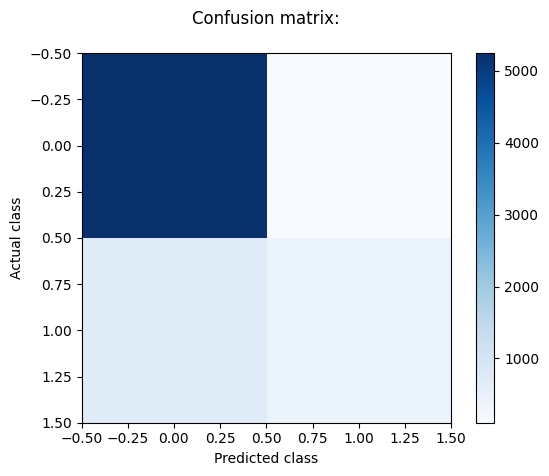

You are free from diabtes

Accuracy when sgd solver is used: 82.98 % when max_iter =  1200
Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      5353
           1       0.00      0.00      0.00      1098

    accuracy                           0.83      6451
   macro avg       0.41      0.50      0.45      6451
weighted avg       0.69      0.83      0.75      6451



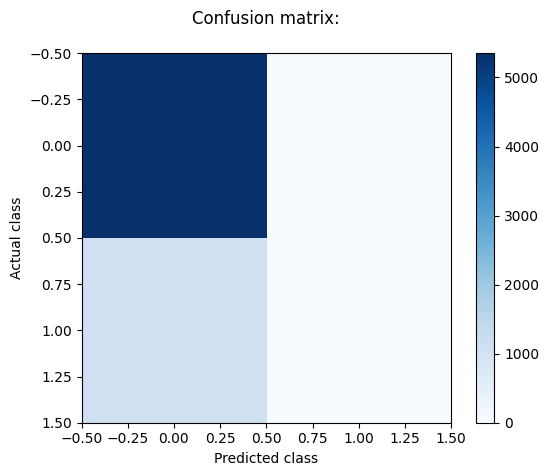

You are free from diabtes

Accuracy when adam solver is used: 86.82 % when max_iter =  1200
Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      5353
           1       0.72      0.37      0.49      1098

    accuracy                           0.87      6451
   macro avg       0.80      0.67      0.71      6451
weighted avg       0.85      0.87      0.85      6451



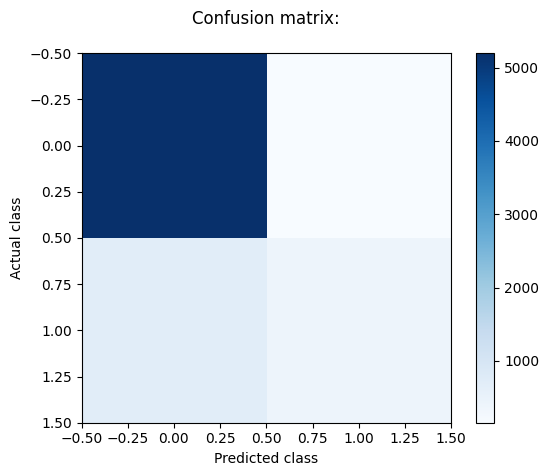

You are free from diabtes

Accuracy when lbfgs solver is used: 87.07 % when max_iter =  1400
Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      5353
           1       0.78      0.34      0.47      1098

    accuracy                           0.87      6451
   macro avg       0.83      0.66      0.70      6451
weighted avg       0.86      0.87      0.85      6451



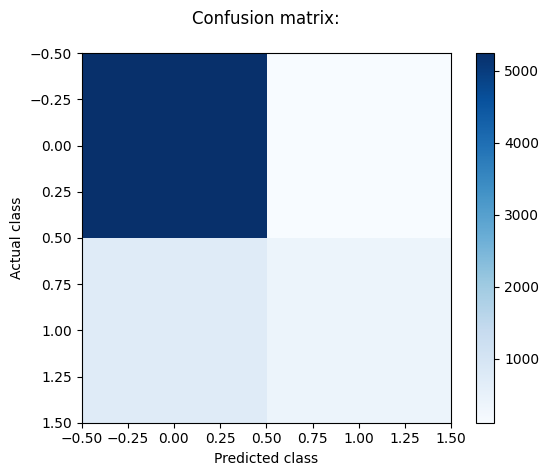

You are free from diabtes

Accuracy when sgd solver is used: 82.98 % when max_iter =  1400
Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      5353
           1       0.00      0.00      0.00      1098

    accuracy                           0.83      6451
   macro avg       0.41      0.50      0.45      6451
weighted avg       0.69      0.83      0.75      6451



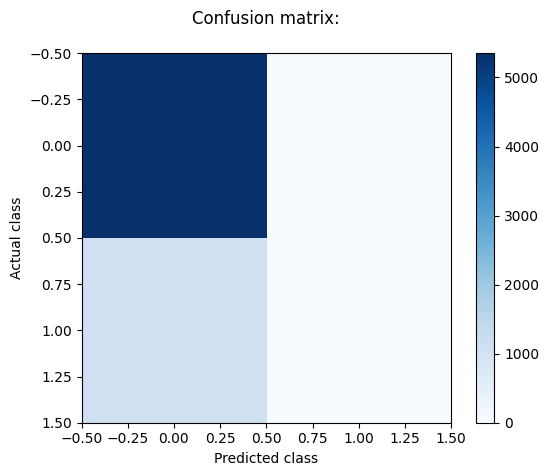

You are free from diabtes

Accuracy when adam solver is used: 86.61 % when max_iter =  1400
Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      5353
           1       0.73      0.34      0.46      1098

    accuracy                           0.87      6451
   macro avg       0.80      0.66      0.69      6451
weighted avg       0.85      0.87      0.85      6451



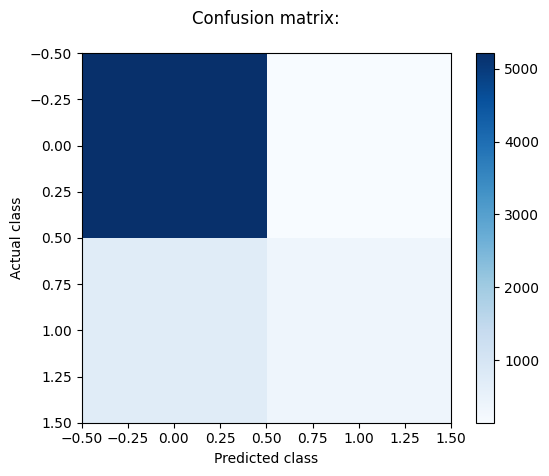

You are free from diabtes

Accuracy when lbfgs solver is used: 86.92 % when max_iter =  1600
Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      5353
           1       0.72      0.38      0.49      1098

    accuracy                           0.87      6451
   macro avg       0.80      0.67      0.71      6451
weighted avg       0.86      0.87      0.85      6451



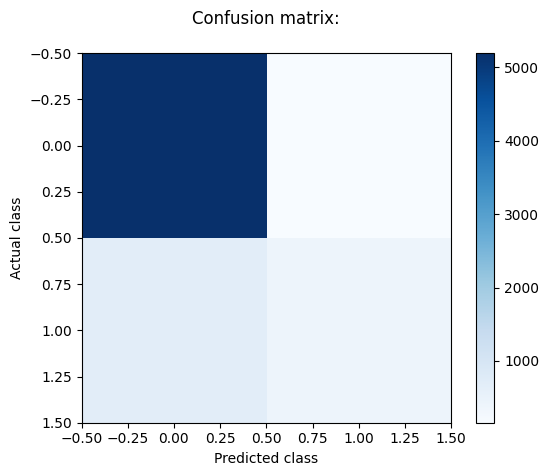

You are free from diabtes

Accuracy when sgd solver is used: 82.98 % when max_iter =  1600
Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      5353
           1       0.00      0.00      0.00      1098

    accuracy                           0.83      6451
   macro avg       0.41      0.50      0.45      6451
weighted avg       0.69      0.83      0.75      6451



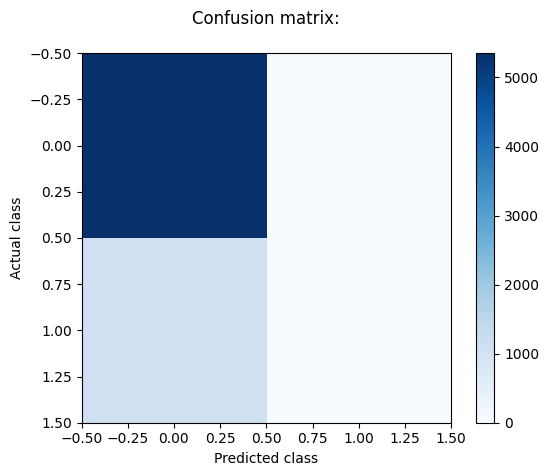

You are free from diabtes

Accuracy when adam solver is used: 86.81 % when max_iter =  1600
Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      5353
           1       0.73      0.36      0.48      1098

    accuracy                           0.87      6451
   macro avg       0.80      0.67      0.70      6451
weighted avg       0.85      0.87      0.85      6451



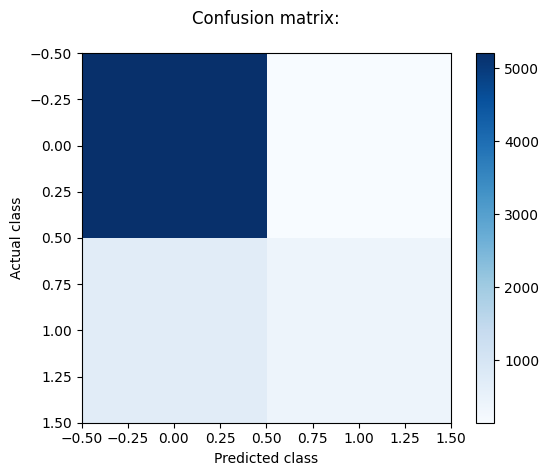

You are free from diabtes

Accuracy when lbfgs solver is used: 87.15 % when max_iter =  1800
Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      5353
           1       0.76      0.36      0.49      1098

    accuracy                           0.87      6451
   macro avg       0.82      0.67      0.71      6451
weighted avg       0.86      0.87      0.85      6451



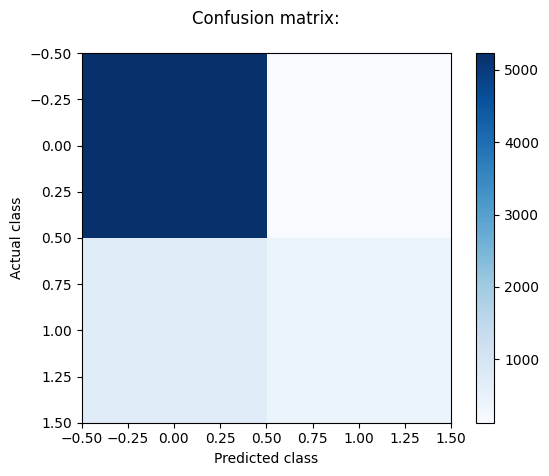

You are free from diabtes

Accuracy when sgd solver is used: 82.98 % when max_iter =  1800
Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      5353
           1       0.00      0.00      0.00      1098

    accuracy                           0.83      6451
   macro avg       0.41      0.50      0.45      6451
weighted avg       0.69      0.83      0.75      6451



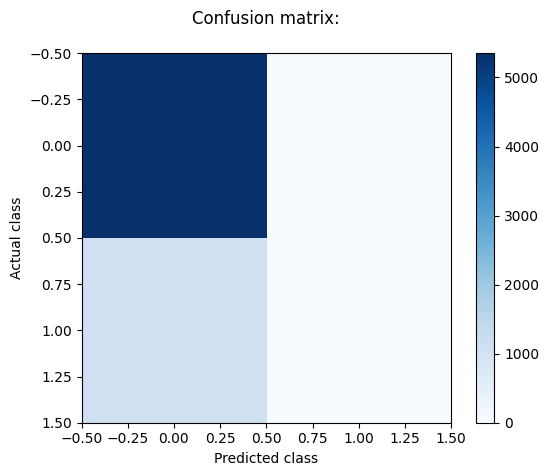

You are free from diabtes

Accuracy when adam solver is used: 86.98 % when max_iter =  1800
Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.88      0.97      0.93      5353
           1       0.73      0.37      0.49      1098

    accuracy                           0.87      6451
   macro avg       0.81      0.67      0.71      6451
weighted avg       0.86      0.87      0.85      6451



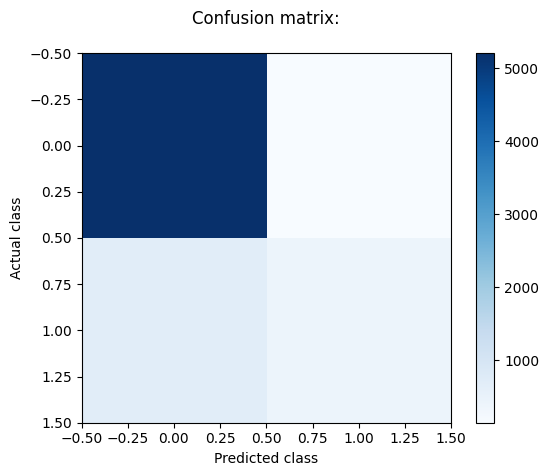

You are free from diabtes

Accuracy when lbfgs solver is used: 87.07 % when max_iter =  2000
Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.88      0.97      0.93      5353
           1       0.74      0.37      0.49      1098

    accuracy                           0.87      6451
   macro avg       0.81      0.67      0.71      6451
weighted avg       0.86      0.87      0.85      6451



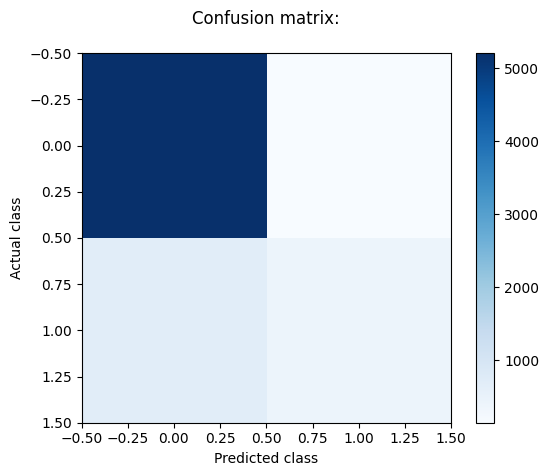

You are free from diabtes

Accuracy when sgd solver is used: 82.98 % when max_iter =  2000
Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      5353
           1       0.00      0.00      0.00      1098

    accuracy                           0.83      6451
   macro avg       0.41      0.50      0.45      6451
weighted avg       0.69      0.83      0.75      6451



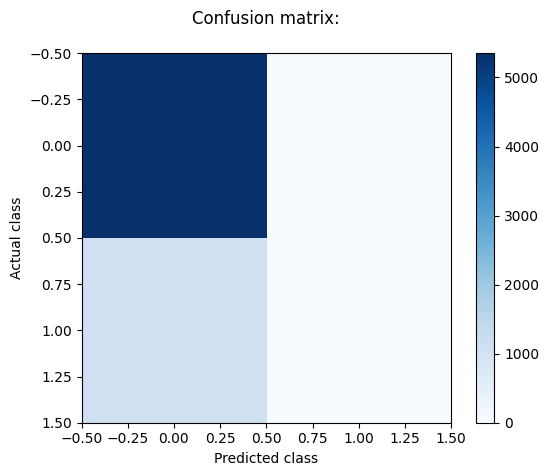

You are free from diabtes

Accuracy when adam solver is used: 86.73 % when max_iter =  2000
Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      5353
           1       0.71      0.38      0.49      1098

    accuracy                           0.87      6451
   macro avg       0.79      0.67      0.71      6451
weighted avg       0.85      0.87      0.85      6451



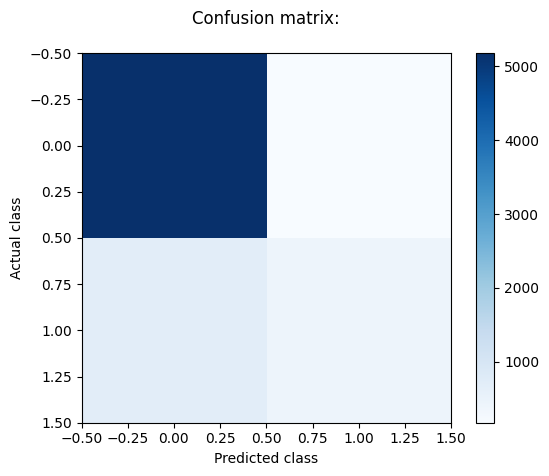

You are free from diabtes



In [11]:
# Creating ANN with different solvers and with max_iterations
print('ANN model in predicting diabetes for clinical features with logistic activation function\n')
for max_iterations in range(1000,2200,200):
  for solvers in ['lbfgs','sgd','adam']:
    model_sgd = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='logistic', solver=solvers, max_iter= max_iterations)
    # Training model_sgd
    model_sgd.fit(X_train, y_train)
    # Evaluate model_sgd on test set
    accuracy = model_sgd.score(X_test, y_test)
    accuracy = round(accuracy*100,2)
    print('Accuracy when', solvers, 'solver is used:', accuracy,'% when max_iter = ',max_iterations)
    # Make predictions on new data
    new_data = pd.DataFrame({'Age': [10], 'BMI': [34], 'HighChol': [1], 'HighBP': [1]})
    predictions_sgg_model_sgd = model_sgd.predict(new_data)

    y_pred = model_sgd.predict(X_test)
    print('Evaluation Metrics:\n')
    print(classification_report(y_test, y_pred))

    confusion_mat = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plt.imshow(confusion_mat, cmap='Blues', interpolation='nearest')
    plt.xlabel('Predicted class')
    plt.ylabel('Actual class')
    plt.colorbar()
    plt.title('Confusion matrix:\n')
    plt.show()


    if predictions_sgg_model_sgd == 1:
      print('You have diabetes')
      print('')
    else:
      print('You are free from diabtes')
      print('')

In [ ]:
# Splitting data into training & testing data
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(fmds_copy.drop('Diabetes', axis=1), fmds_copy['Diabetes'], test_size=0.25, random_state=42)

Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      5353
           1       0.69      0.34      0.46      1098

    accuracy                           0.86      6451
   macro avg       0.79      0.66      0.69      6451
weighted avg       0.85      0.86      0.84      6451



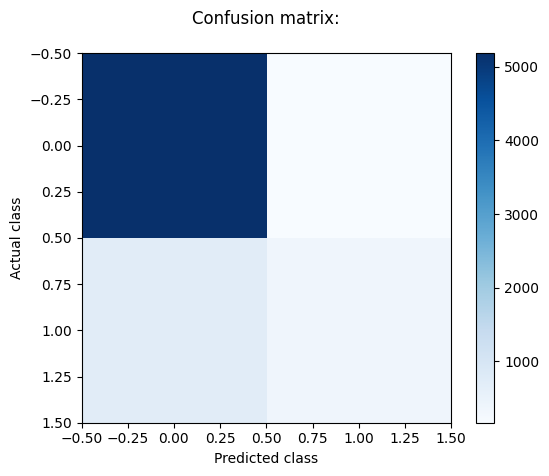

Accuracy of logistic regression when age is not considered: 86.23 %


In [7]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(fmds_copy.drop('Diabetes', axis=1), fmds_copy['Diabetes'], test_size=0.25, random_state=42)
model_lr = LogisticRegression()
model_lr.fit(X_train_lr, y_train_lr)
y_pred_lr = model_lr.predict(X_test_lr)
accuracy = accuracy_score(y_test_lr, y_pred_lr)
accuracy = round(accuracy*100,2)

print('Evaluation Metrics:\n')
print(classification_report(y_test_lr, y_pred_lr))

confusion_mat = confusion_matrix(y_test_lr, y_pred_lr)

# Plot the confusion matrix
plt.imshow(confusion_mat, cmap='Blues', interpolation='nearest')
plt.xlabel('Predicted class')
plt.ylabel('Actual class')
plt.colorbar()
plt.title('Confusion matrix:\n')
plt.show()
print('Accuracy of logistic regression when age is not considered:', accuracy,'%')

In [ ]:
# Splitting data into training & testing data
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(fmds_copy.drop('Diabetes', axis=1), fmds_copy['Diabetes'], test_size=0.25, random_state=42)

Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      5353
           1       0.00      0.00      0.00      1098

    accuracy                           0.83      6451
   macro avg       0.41      0.50      0.45      6451
weighted avg       0.69      0.83      0.75      6451



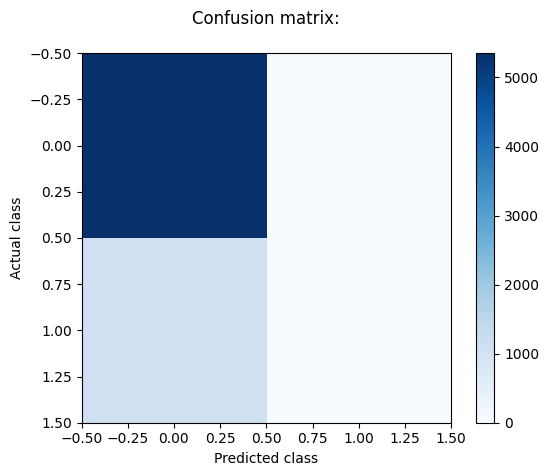

Accuracy of SVM when age is considered: 82.98 %


In [6]:
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(fmds_copy.drop('Diabetes', axis=1), fmds_copy['Diabetes'], test_size=0.25, random_state=42)
model_svm = SVC(kernel='rbf')
model_svm.fit(X_train_svm, y_train_svm)
y_pred_svm = model_svm.predict(X_test_svm)
accuracy = accuracy_score(y_test_svm, y_pred_svm)
accuracy = round(accuracy*100,2)

print('Evaluation Metrics:\n')
print(classification_report(y_test_svm, y_pred_svm))

confusion_mat = confusion_matrix(y_test_svm, y_pred_svm)

# Plot the confusion matrix
plt.imshow(confusion_mat, cmap='Blues', interpolation='nearest')
plt.xlabel('Predicted class')
plt.ylabel('Actual class')
plt.colorbar()
plt.title('Confusion matrix:\n')
plt.show()
print('Accuracy of SVM when age is considered:', accuracy,'%')

Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      5353
           1       0.37      0.33      0.35      1098

    accuracy                           0.79      6451
   macro avg       0.62      0.61      0.61      6451
weighted avg       0.78      0.79      0.79      6451



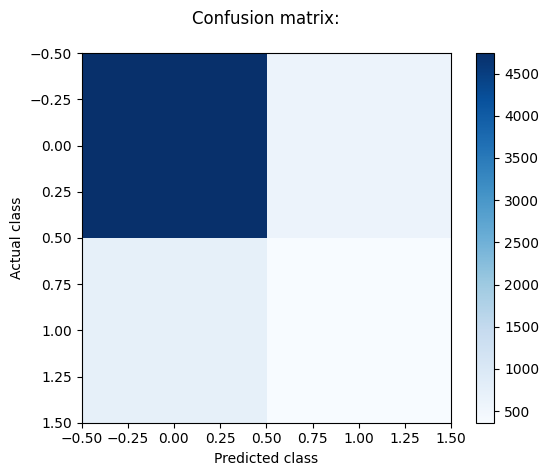

Accuracy of Decision Tree when age is considered: 79.14 %



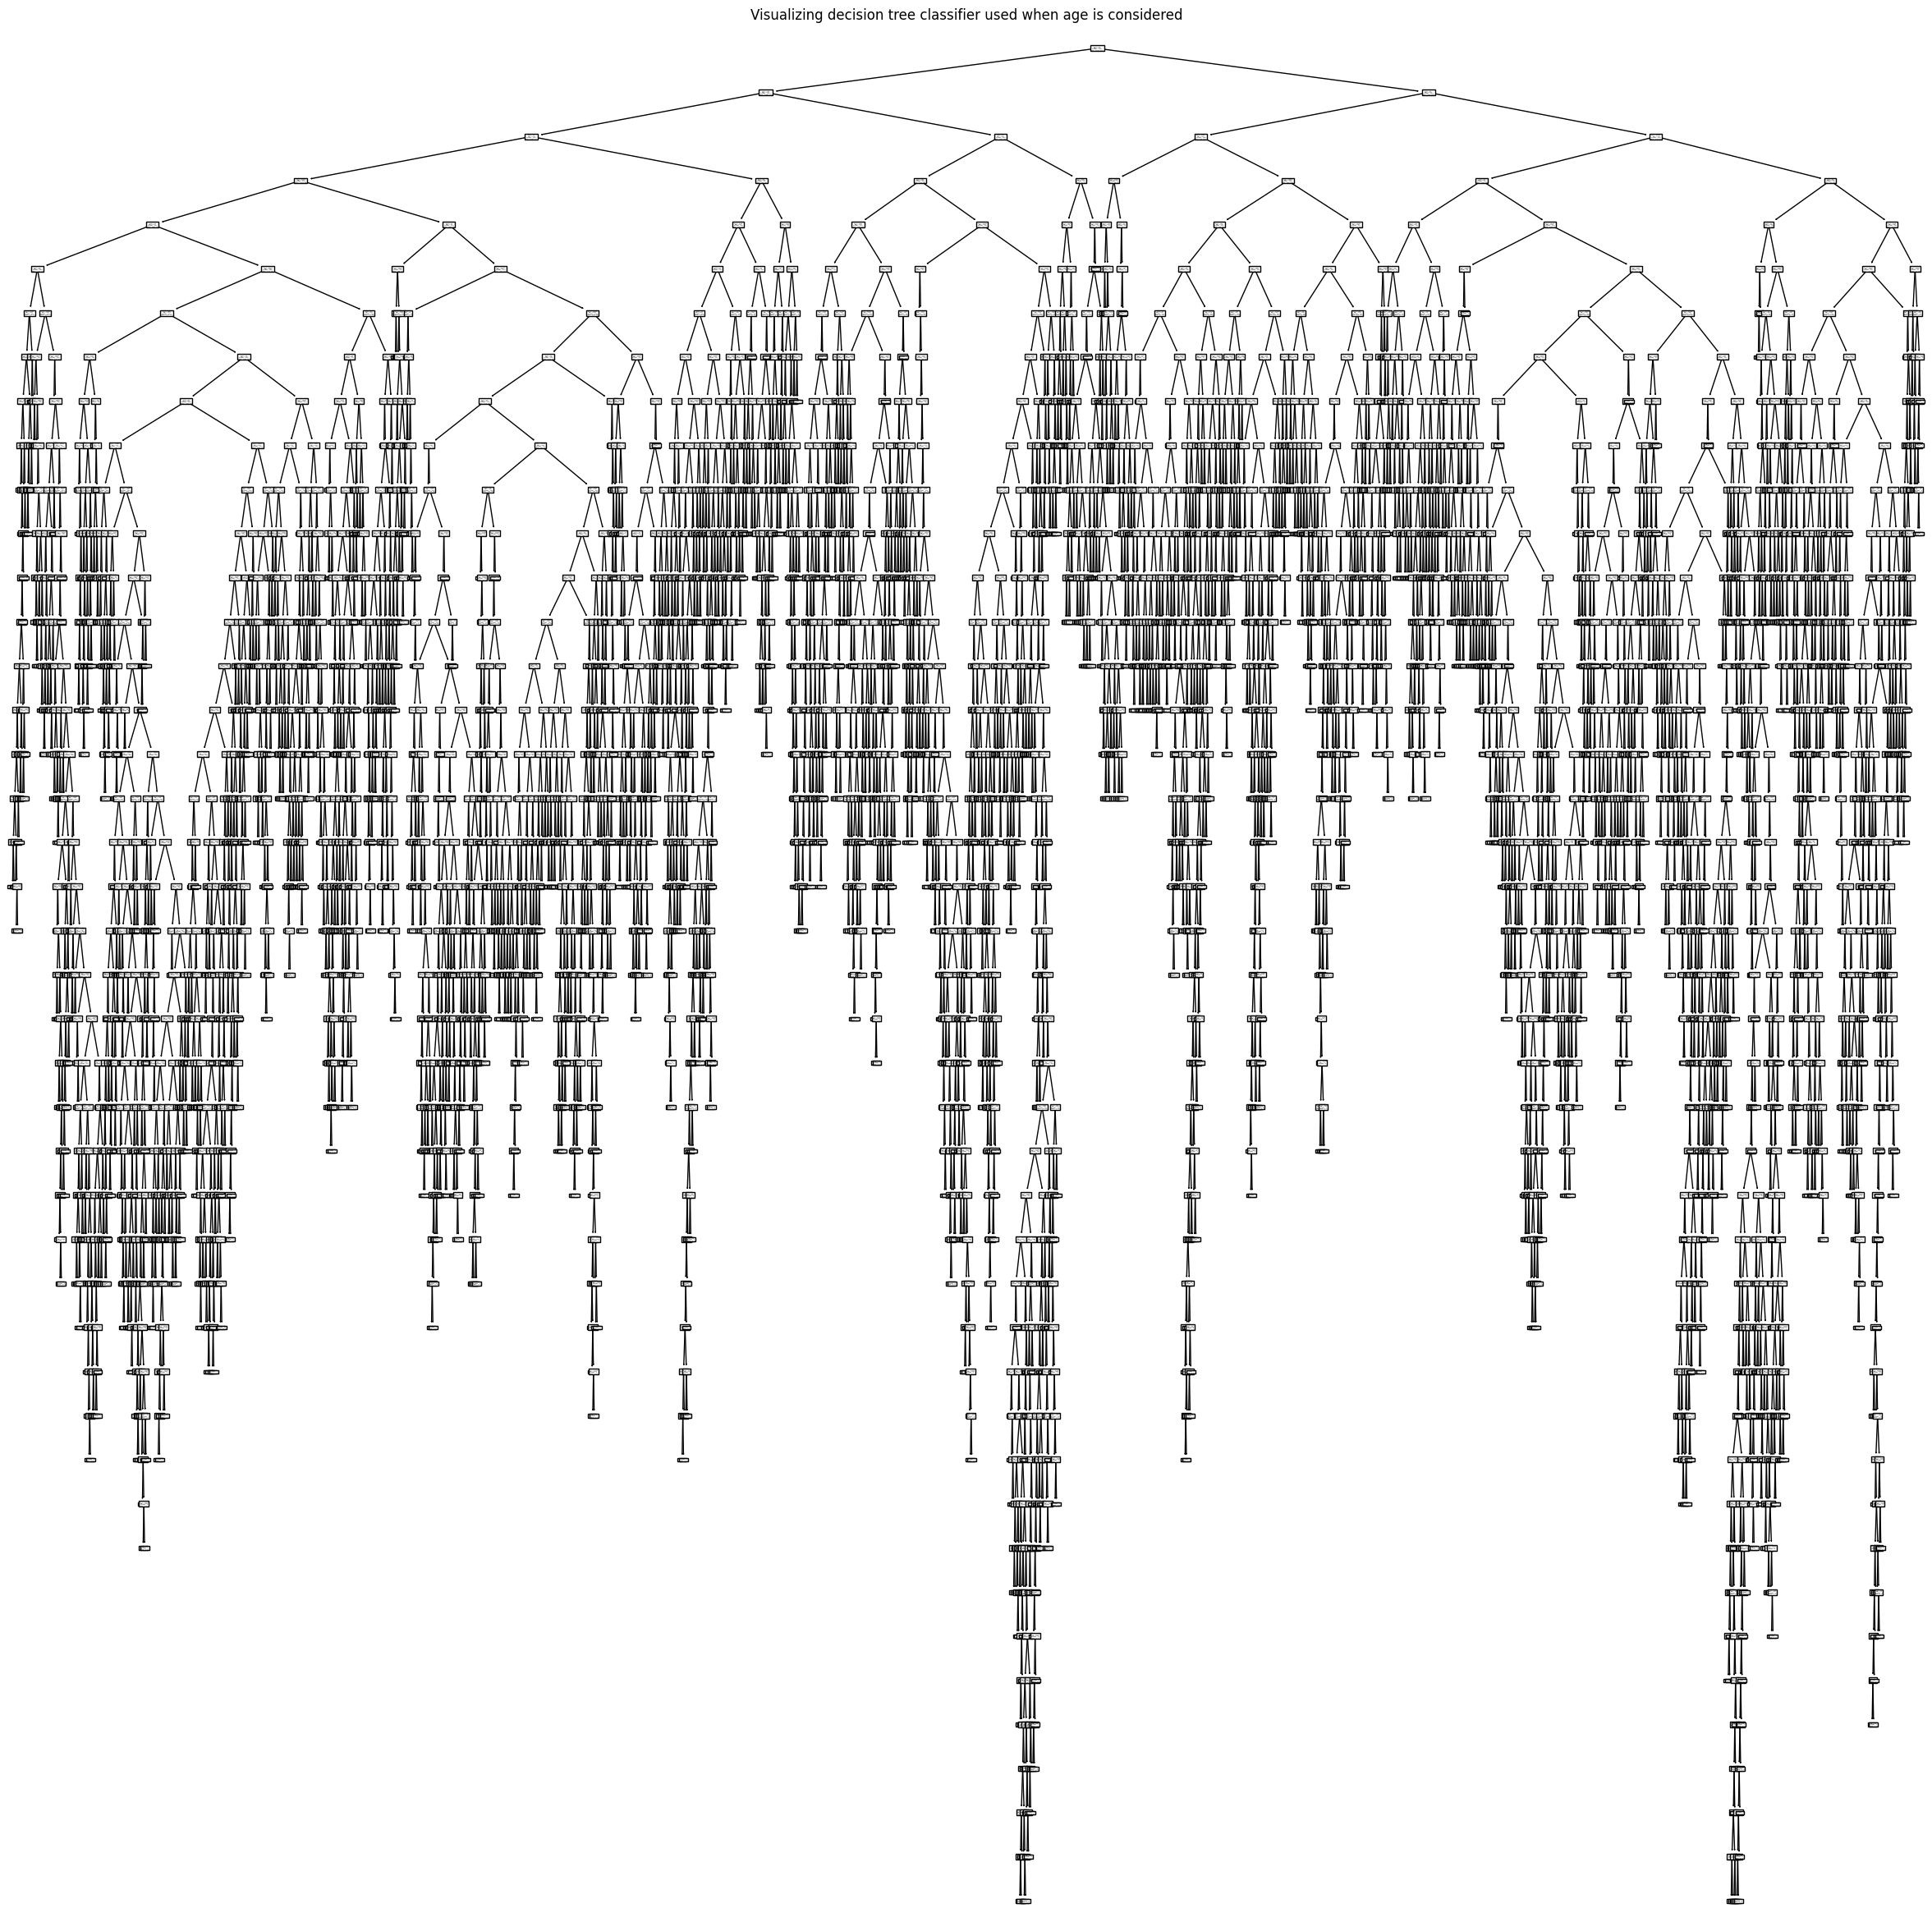

In [5]:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(fmds_copy.drop('Diabetes', axis=1), fmds_copy['Diabetes'], test_size=0.25, random_state=42)
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_dt, y_train_dt)
y_pred_dt = model_dt.predict(X_test_dt)
accuracy = accuracy_score(y_test_dt, y_pred_dt)
accuracy = round(accuracy*100,2)

print('Evaluation Metrics:\n')
print(classification_report(y_test_dt, y_pred_dt))

confusion_mat = confusion_matrix(y_test_dt, y_pred_dt)

# Plot the confusion matrix
plt.imshow(confusion_mat, cmap='Blues', interpolation='nearest')
plt.xlabel('Predicted class')
plt.ylabel('Actual class')
plt.colorbar()
plt.title('Confusion matrix:\n')
plt.show()
print('Accuracy of Decision Tree when age is considered:', accuracy,'%\n')

plt.figure(figsize=(30, 30))
plot_tree(model_dt)
plt.title('Visualizing decision tree classifier used when age is considered')
plt.show()